In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import japanize_matplotlib # 追加

In [2]:
csv_file_path = "/home/rest/forpyzx/kekka0107/0114bunpu_10000_100zutu.csv"
df = pd.read_csv(csv_file_path)

(2828, 4)
Qubit = 4: -0.21382733450728292
Qubit = 8: -0.8900374366748265
Qubit = 12: -0.8713646367803245
Qubit = 16: -0.7476806781344998


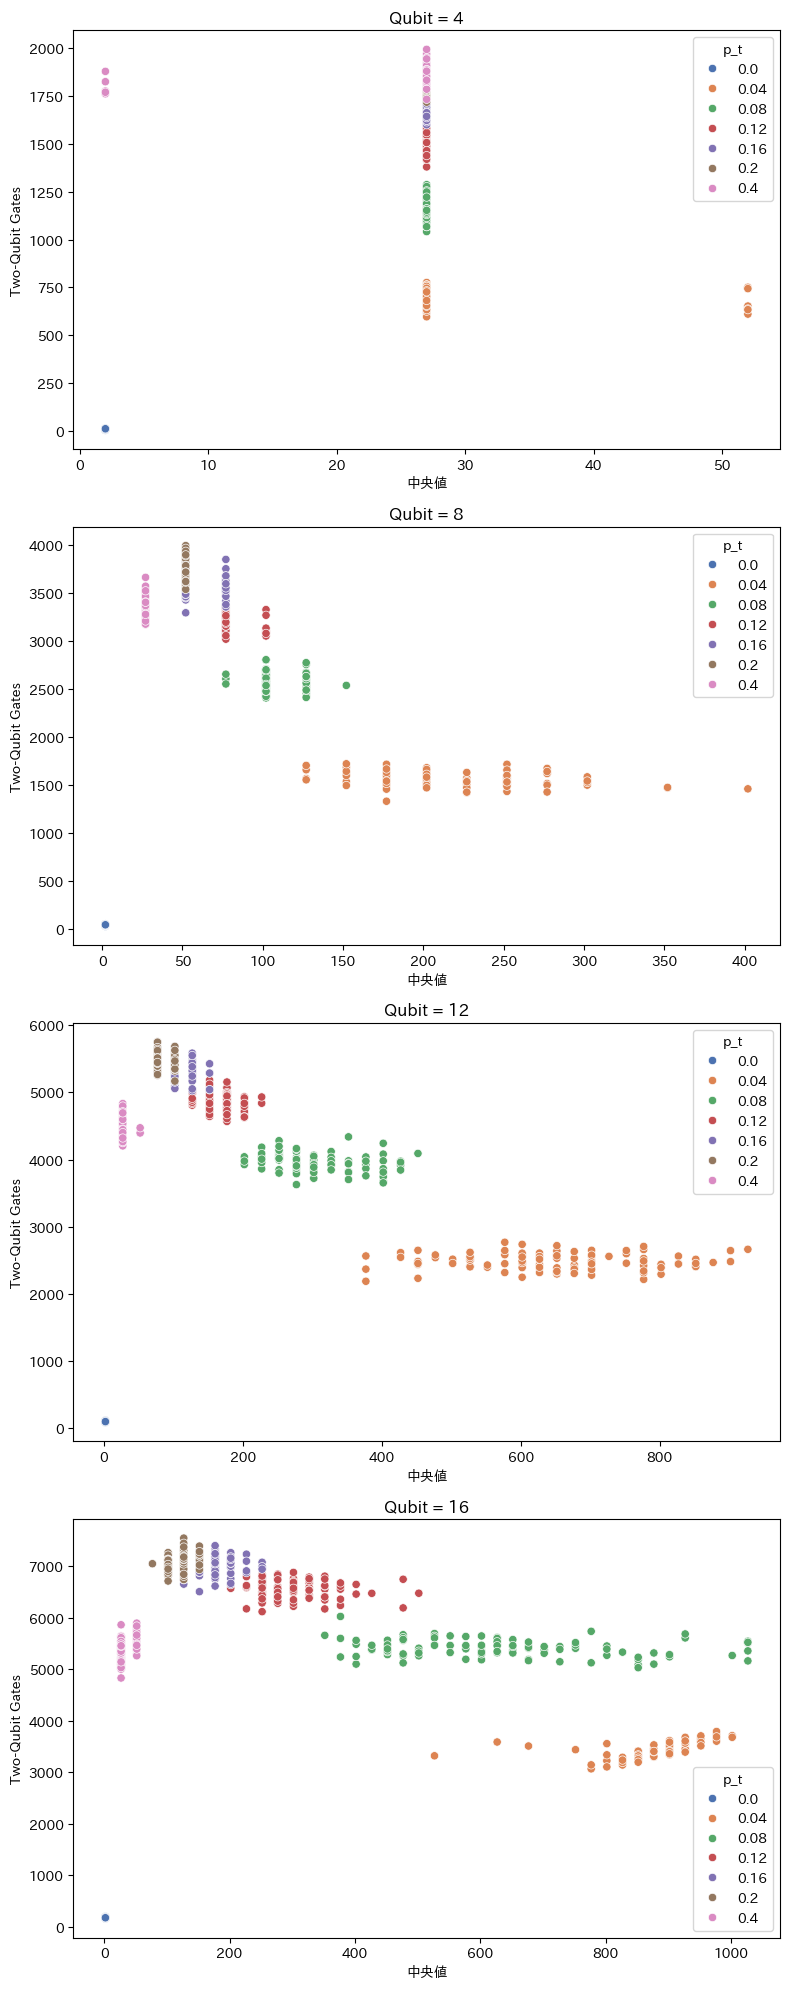

Qubit = 4, p_t = 0: nan
Qubit = 4, p_t = 0.04: -0.08103177717001628
Qubit = 4, p_t = 0.08: nan
Qubit = 4, p_t = 0.12: nan
Qubit = 4, p_t = 0.16: nan
Qubit = 4, p_t = 0.2: nan
Qubit = 4, p_t = 0.4: 0.26393489854905644
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: -0.23857344508375758
Qubit = 8, p_t = 0.08: -0.11097213502530953
Qubit = 8, p_t = 0.12: -0.19524738150068108
Qubit = 8, p_t = 0.16: -0.052945455382892824
Qubit = 8, p_t = 0.2: nan
Qubit = 8, p_t = 0.4: nan
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.0012652980918889025
Qubit = 12, p_t = 0.08: -0.26726819172412075
Qubit = 12, p_t = 0.12: -0.2361376056207212
Qubit = 12, p_t = 0.16: -0.046762456431300156
Qubit = 12, p_t = 0.2: 0.03331212032149341
Qubit = 12, p_t = 0.4: -0.057612029100074146
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.5695358454895219
Qubit = 16, p_t = 0.08: -0.22202347609242704
Qubit = 16, p_t = 0.12: -0.11629410812248453
Qubit = 16, p_t = 0.16: 0.04717724092185479
Qubit = 16, p_t = 0.2: 0.315117707

In [13]:
#横軸 median
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #columns_after_0の中央値
            #median = np.median(columns_after_0)
            
            # 合計の半分を計算
            total_sum = columns_after_0.sum()
            target = total_sum / 2

            # 累積和を計算
            cumulative_sum = columns_after_0.cumsum()
            # 目標値を超える最初のインデックスを取得
            index = np.where(cumulative_sum >= target)[0][0]
            # 該当する元データのインデックス名を取得
            index_label = columns_after_0.index[index]
            # 中央値を取得
            median = 2 + (5* int(index_label))

            x.append(median)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('中央値')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#q, p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t_value in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t'] == p_t_value)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['mean', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['mean', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t_value}: {correlation_value}")

/tmp/ipykernel_1712705/2777091061.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  souwa += columns_after_0[i] * (2.5 + 5 * i)


(2828, 4)
Qubit = 4: -0.9085281635297782
Qubit = 8: -0.8963398487240015
Qubit = 12: -0.8719277851383654
Qubit = 16: -0.7262380833071682


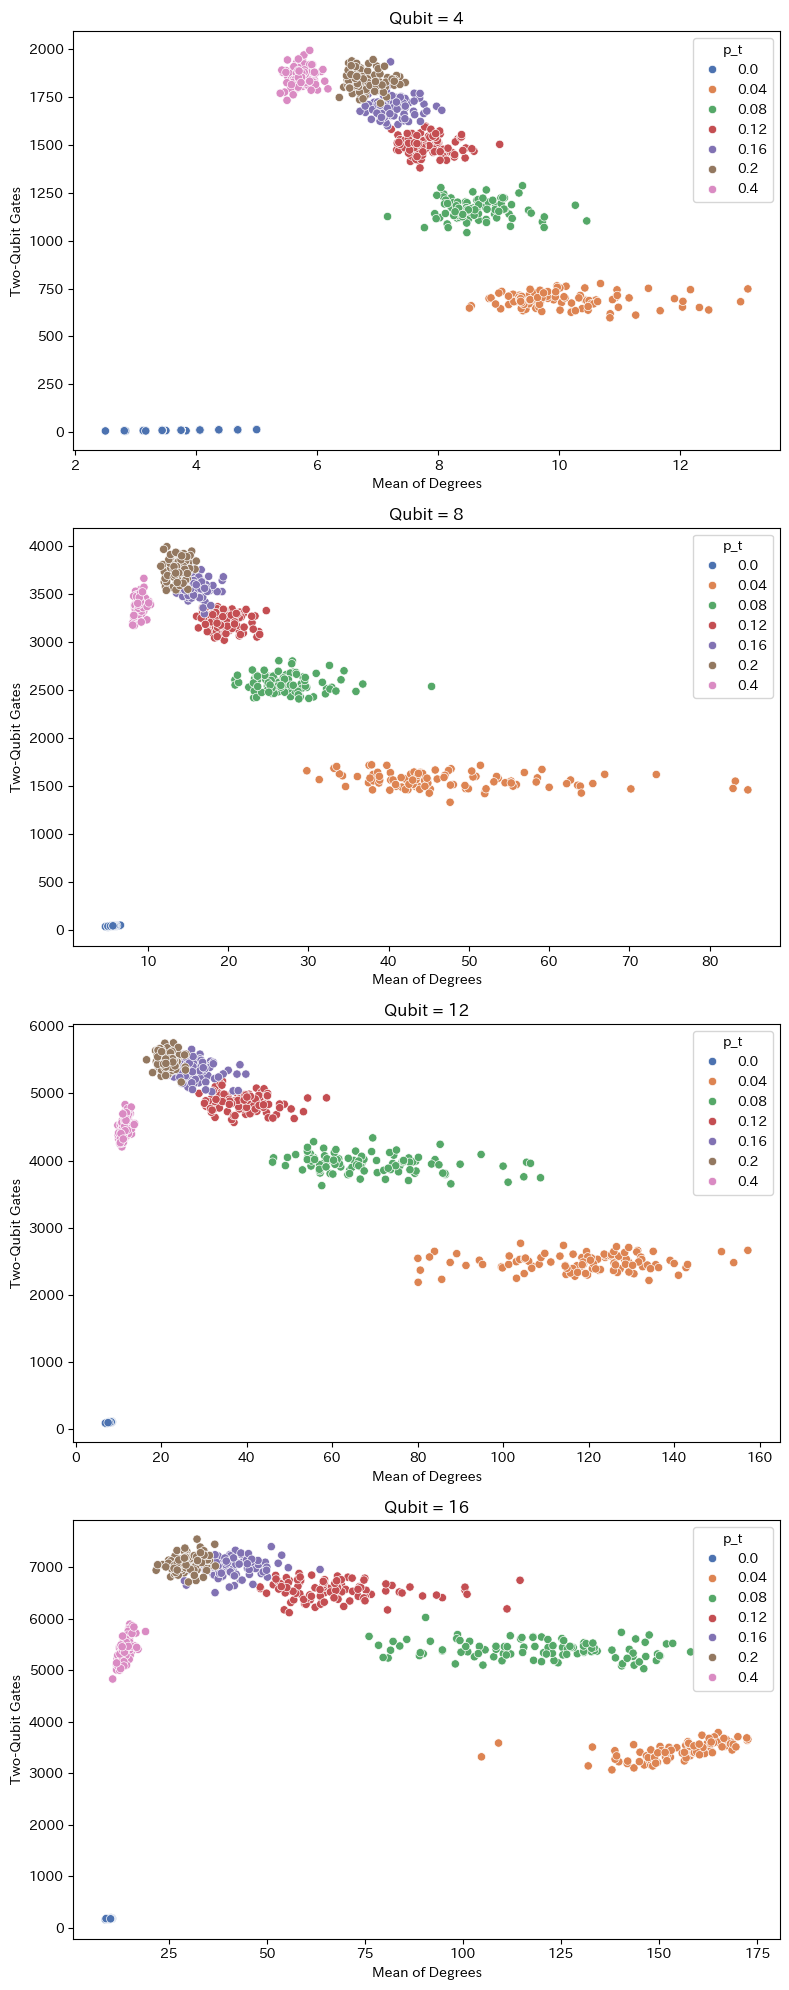

Qubit = 4, p_t = 0: 0.8543693533135189
Qubit = 4, p_t = 0.04: -0.03863155677067803
Qubit = 4, p_t = 0.08: -0.006673961527958594
Qubit = 4, p_t = 0.12: -0.09900197448822978
Qubit = 4, p_t = 0.16: -0.07159627836207019
Qubit = 4, p_t = 0.2: -0.08798242254291094
Qubit = 4, p_t = 0.4: 0.09487499150177692
Qubit = 8, p_t = 0: 0.7653663757817688
Qubit = 8, p_t = 0.04: -0.27007347856116426
Qubit = 8, p_t = 0.08: -0.09680721608449763
Qubit = 8, p_t = 0.12: -0.11336224379203037
Qubit = 8, p_t = 0.16: -0.18011900863173155
Qubit = 8, p_t = 0.2: 0.16262326660221613
Qubit = 8, p_t = 0.4: 0.3148085967054192
Qubit = 12, p_t = 0: 0.7145193618874811
Qubit = 12, p_t = 0.04: 0.10566596915385496
Qubit = 12, p_t = 0.08: -0.2845909162673782
Qubit = 12, p_t = 0.12: -0.19807722726488458
Qubit = 12, p_t = 0.16: -0.08876783344272812
Qubit = 12, p_t = 0.2: -0.008547478897752299
Qubit = 12, p_t = 0.4: 0.467962655856398
Qubit = 16, p_t = 0: 0.6407099193488284
Qubit = 16, p_t = 0.04: 0.5625263887264167
Qubit = 16, p_

In [4]:
#横軸 平均次数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #print(two_qubit_gates)
            #次数取得
            start_col_index = row.index.get_loc('0')  # '0' のインデックスを取得
            columns_after_0 = row.iloc[start_col_index:]  # '0' 以降をスライス
            #print(columns_after_0)
            #平均値
            #要素数の和
            sum = columns_after_0.sum()
            #総和
            souwa =0
            for i in range(len(columns_after_0)):
                souwa += columns_after_0[i] * (2.5 + 5 * i)

            #次数の平均値
            mean = souwa / sum

            x.append(mean)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'mean': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    #paletteをviridis以外
    sns.scatterplot(data=subset, x='mean', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('Mean of Degrees')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['mean', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['mean', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整

plt.tight_layout()
plt.savefig("/home/rest/forpyzx/kekka1415/mean_degree_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['mean', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['mean', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(2828, 4)
Qubit = 4: 0.9851110534977876
Qubit = 8: -0.33733160986449207
Qubit = 12: -0.5868393904152581
Qubit = 16: -0.2689816486679256


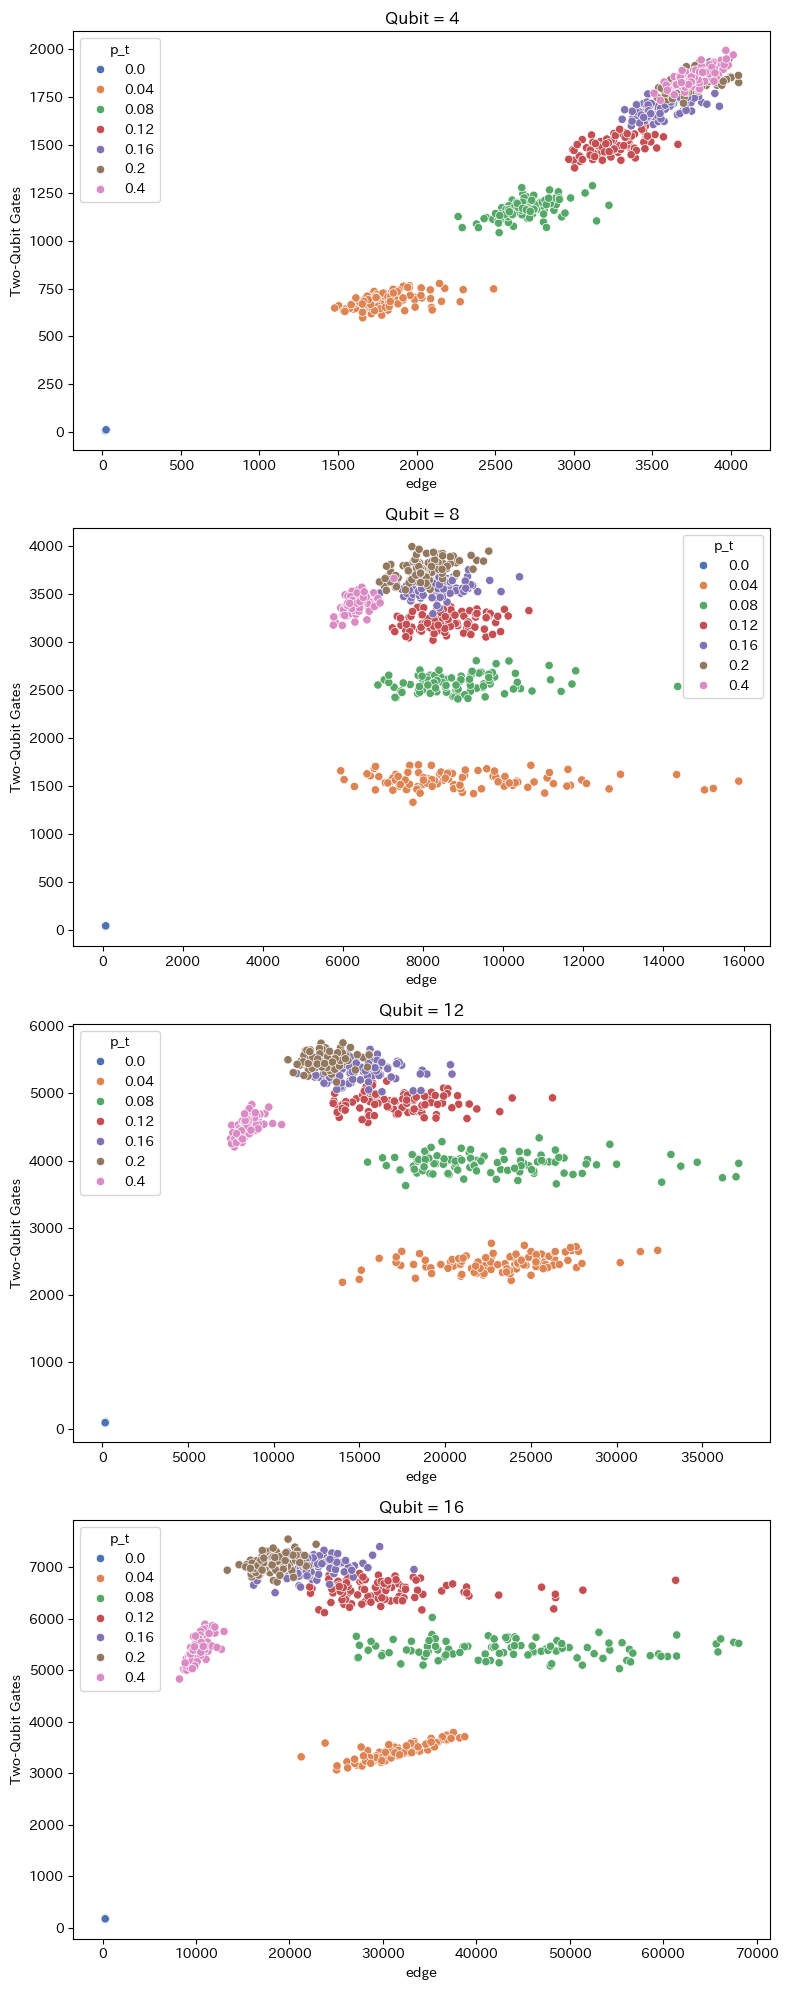

Qubit = 4, p_t = 0: 0.9522166303980073
Qubit = 4, p_t = 0.04: 0.48335947004486374
Qubit = 4, p_t = 0.08: 0.5274049722466566
Qubit = 4, p_t = 0.12: 0.5147518626247216
Qubit = 4, p_t = 0.16: 0.5872981802450208
Qubit = 4, p_t = 0.2: 0.571436856650947
Qubit = 4, p_t = 0.4: 0.7638886342710972
Qubit = 8, p_t = 0: 0.8336826453548734
Qubit = 8, p_t = 0.04: -0.08994845496791941
Qubit = 8, p_t = 0.08: 0.15172418269917212
Qubit = 8, p_t = 0.12: 0.19884172109710618
Qubit = 8, p_t = 0.16: 0.15554982681947876
Qubit = 8, p_t = 0.2: 0.47945695390539705
Qubit = 8, p_t = 0.4: 0.5278977517533987
Qubit = 12, p_t = 0: 0.7543785423839683
Qubit = 12, p_t = 0.04: 0.4089194627239711
Qubit = 12, p_t = 0.08: -0.13043272542237894
Qubit = 12, p_t = 0.12: -0.007900175411597717
Qubit = 12, p_t = 0.16: 0.08094170103465766
Qubit = 12, p_t = 0.2: 0.17306096836362814
Qubit = 12, p_t = 0.4: 0.6161646501087403
Qubit = 16, p_t = 0: 0.7288928479849174
Qubit = 16, p_t = 0.04: 0.8157767483811302
Qubit = 16, p_t = 0.08: -0.033

In [9]:
#横軸、エッジ数　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            edge = row['edge count']

            x.append(edge)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'edge': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='edge', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('edge')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['edge', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['edge', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #corr = subset[['mean', 'two_qubit_gates']].corr()
        #meanとtwo_qubitの相関係数のみを取得
        corr = subset[['edge', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['edge', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(2828, 4)
Qubit = 4: 0.9790237989997278
Qubit = 8: 0.9278381213228369
Qubit = 12: 0.8676165621029506
Qubit = 16: 0.8168216377027405


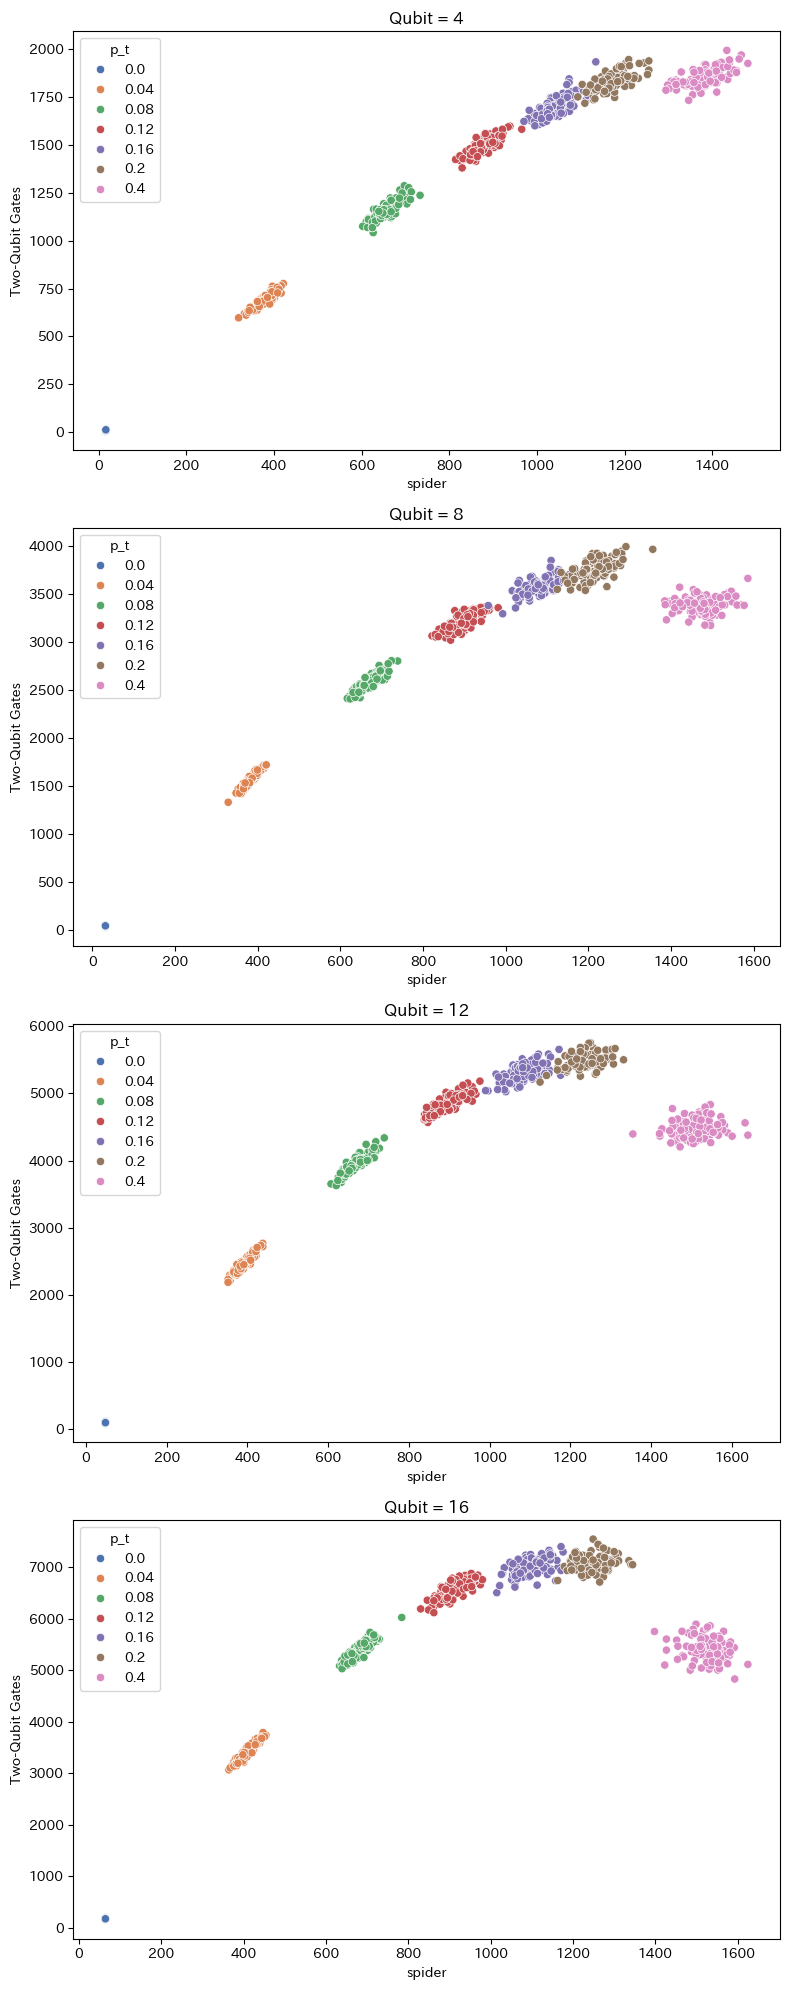

Qubit = 4, p_t = 0: 0.40945481431620556
Qubit = 4, p_t = 0.04: 0.9247385207820963
Qubit = 4, p_t = 0.08: 0.8367544975771436
Qubit = 4, p_t = 0.12: 0.8344987790702711
Qubit = 4, p_t = 0.16: 0.7598242715945178
Qubit = 4, p_t = 0.2: 0.6914186735816397
Qubit = 4, p_t = 0.4: 0.641109304131727
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9609866938055383
Qubit = 8, p_t = 0.08: 0.8873888263404669
Qubit = 8, p_t = 0.12: 0.7804278854718915
Qubit = 8, p_t = 0.16: 0.6950272140823087
Qubit = 8, p_t = 0.2: 0.6280295370514148
Qubit = 8, p_t = 0.4: 0.1598945192338505
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9554293858348071
Qubit = 12, p_t = 0.08: 0.9122300946339993
Qubit = 12, p_t = 0.12: 0.8212504423467706
Qubit = 12, p_t = 0.16: 0.6188294046135493
Qubit = 12, p_t = 0.2: 0.4362403423353139
Qubit = 12, p_t = 0.4: 0.14270183291936156
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.9476130890530103
Qubit = 16, p_t = 0.08: 0.8953382912826163
Qubit = 16, p_t = 0.12: 0.7780592073171377
Q

In [6]:
#横軸　スパイダー　
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            spider = row['spider count']
            x.append(spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) ]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/edge_two.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(2828, 4)
Qubit = 4: -0.9082307255971445
Qubit = 8: -0.8962814831385145
Qubit = 12: -0.8708466447819202
Qubit = 16: -0.7008516820564153


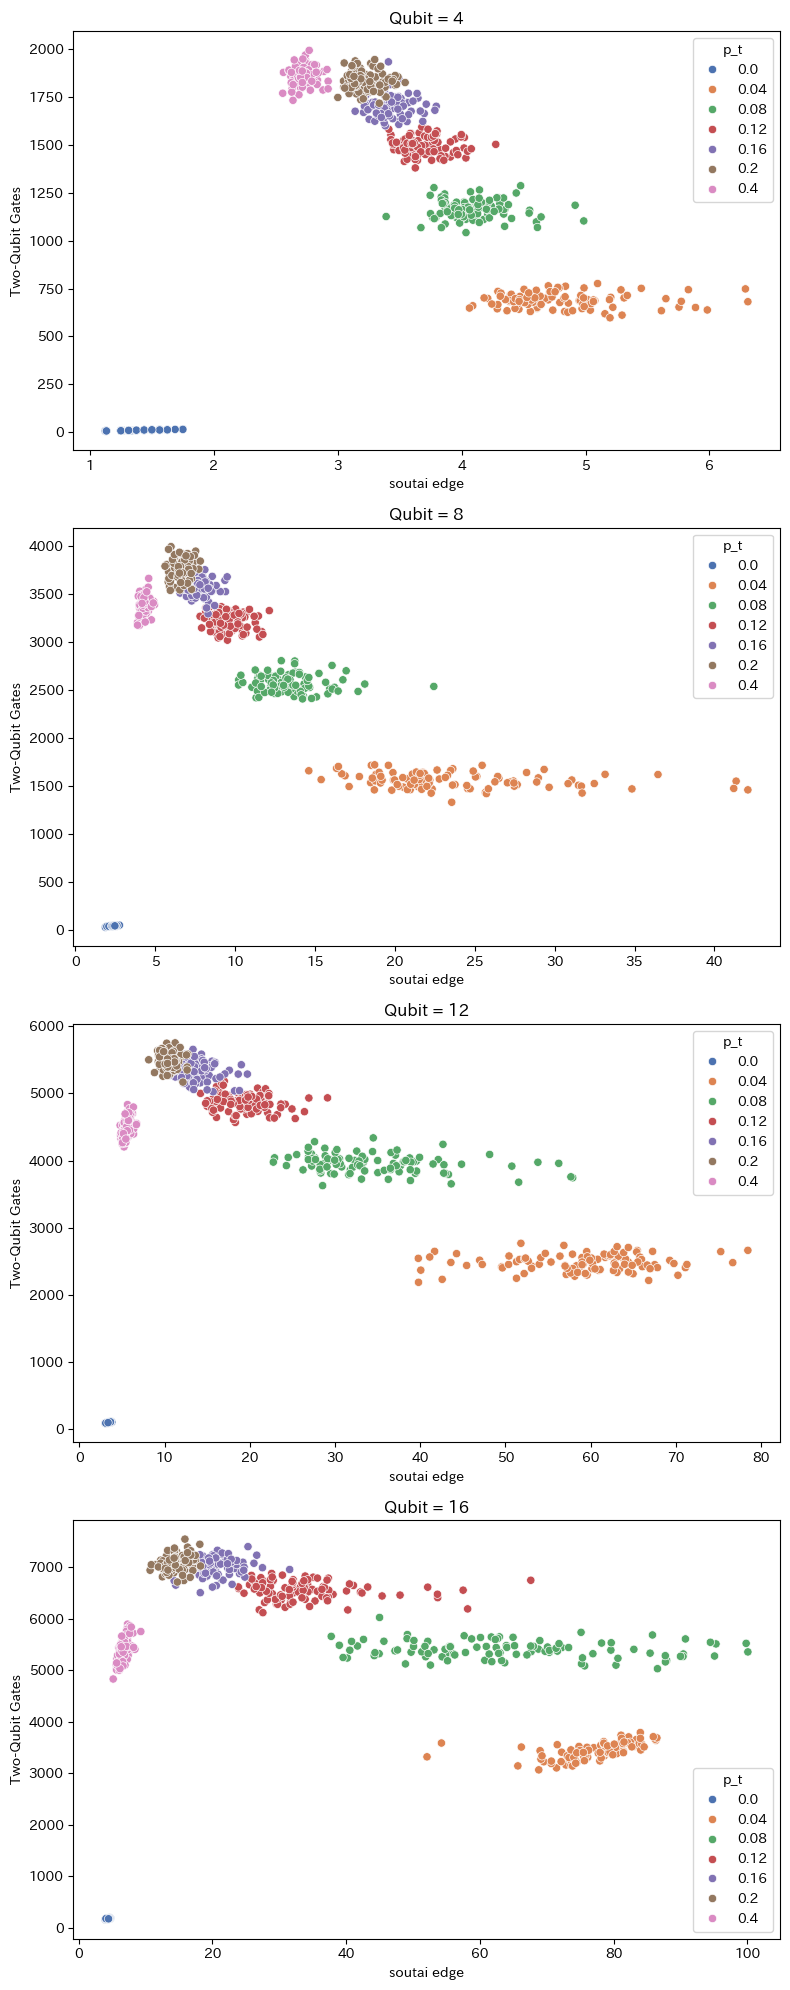

Qubit = 4, p_t = 0: 0.9473386140580644
Qubit = 4, p_t = 0.04: -0.028463375951548246
Qubit = 4, p_t = 0.08: -0.003640959112862629
Qubit = 4, p_t = 0.12: -0.08477880176664229
Qubit = 4, p_t = 0.16: -0.07591193749899265
Qubit = 4, p_t = 0.2: -0.08447421908741504
Qubit = 4, p_t = 0.4: 0.09799016099718431
Qubit = 8, p_t = 0: 0.8336826453548734
Qubit = 8, p_t = 0.04: -0.26940824961910137
Qubit = 8, p_t = 0.08: -0.09879345730775715
Qubit = 8, p_t = 0.12: -0.11082617128144476
Qubit = 8, p_t = 0.16: -0.18052535619307758
Qubit = 8, p_t = 0.2: 0.16399332709057401
Qubit = 8, p_t = 0.4: 0.3238204701946628
Qubit = 12, p_t = 0: 0.7543785423839684
Qubit = 12, p_t = 0.04: 0.10659386241686804
Qubit = 12, p_t = 0.08: -0.28730007321794354
Qubit = 12, p_t = 0.12: -0.19772256360030105
Qubit = 12, p_t = 0.16: -0.08979678616353462
Qubit = 12, p_t = 0.2: -0.005775862615565741
Qubit = 12, p_t = 0.4: 0.46918830446593884
Qubit = 16, p_t = 0: 0.7288928479849174
Qubit = 16, p_t = 0.04: 0.5790750834206302
Qubit = 16

In [7]:
#横軸　エッジ数/スパイダー
#横軸、次数の特徴量　縦軸　2量子ゲート数の散布図
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #2量子ゲート数取得
            two_qubit_gates = row['two-qubit_gates']
            #次数取得
            edge = row['edge count']
            spider = row['spider count']
            soutai_spider = edge / spider
            #soutai_spider = spider / edge

            x.append(soutai_spider)
            y.append(two_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'soutai edge': x,
    'two_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='soutai edge', y='two_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('soutai edge')
    ax.set_ylabel('Two-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['soutai edge', 'two_qubit_gates']].corr()
    correlation_value = corr.loc['soutai edge', 'two_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['soutai edge', 'two_qubit_gates']].corr()
        correlation_value = corr.loc['soutai edge', 'two_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")

(2828, 4)
Qubit = 4: 0.9994536047185729
Qubit = 8: 0.999197104046387
Qubit = 12: 0.9990007393659487
Qubit = 16: 0.9989214658304301


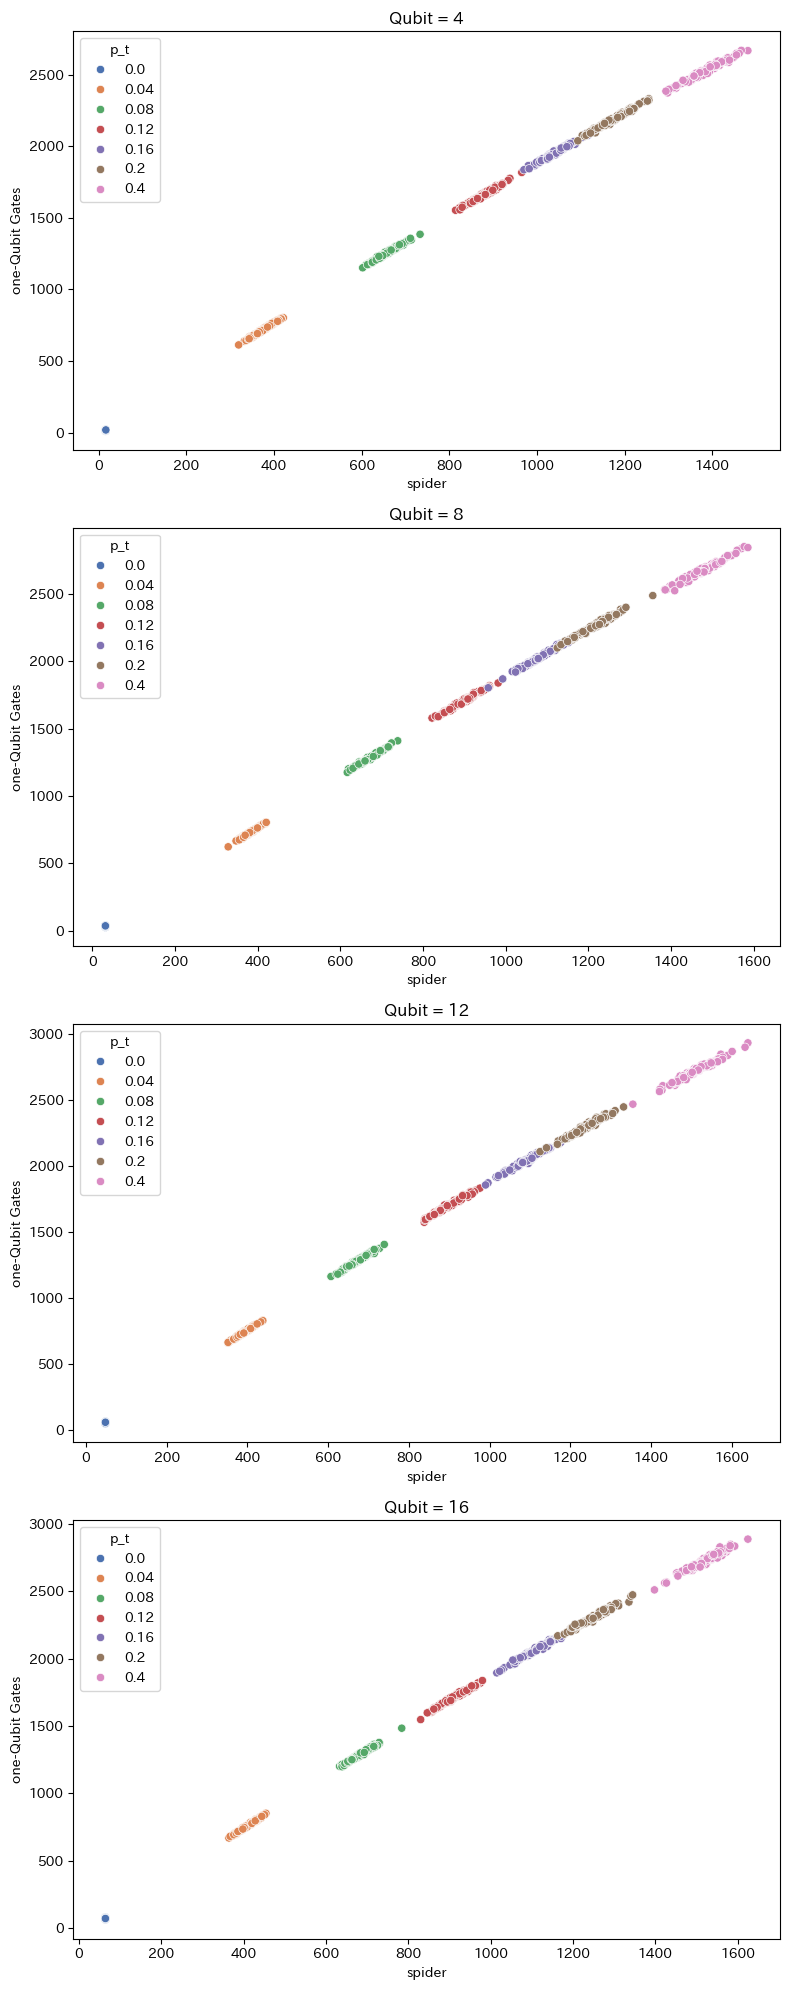

Qubit = 4, p_t = 0: 0.26667483509884626
Qubit = 4, p_t = 0.04: 0.9952237583879402
Qubit = 4, p_t = 0.08: 0.992561520733632
Qubit = 4, p_t = 0.12: 0.9906134460724186
Qubit = 4, p_t = 0.16: 0.9921237737975991
Qubit = 4, p_t = 0.2: 0.9918460311391568
Qubit = 4, p_t = 0.4: 0.9873861959891947
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.9945532315271068
Qubit = 8, p_t = 0.08: 0.9933542367125235
Qubit = 8, p_t = 0.12: 0.9919192989706778
Qubit = 8, p_t = 0.16: 0.9943422436972865
Qubit = 8, p_t = 0.2: 0.9909627891185234
Qubit = 8, p_t = 0.4: 0.9878376442851202
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.9955659821023115
Qubit = 12, p_t = 0.08: 0.9914763698190572
Qubit = 12, p_t = 0.12: 0.9904736549656648
Qubit = 12, p_t = 0.16: 0.9913711872364357
Qubit = 12, p_t = 0.2: 0.9871665950252996
Qubit = 12, p_t = 0.4: 0.9891311613727937
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.9945676610719135
Qubit = 16, p_t = 0.08: 0.9915814550401574
Qubit = 16, p_t = 0.12: 0.9905183972855978
Qu

In [8]:
#横軸 スパイダー　縦軸1量子ゲート数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]
plot_columns_str = [str(i) for i in range(0, 206, 5)]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            #1量子ゲート数取得
            one_qubit_gates = row['one-qubit_gates']
            #次数取得
            spider = row['spider count']
            
            x.append(spider)
            y.append(one_qubit_gates)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'one_qubit_gates': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='one_qubit_gates', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('one-Qubit Gates')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'one_qubit_gates']].corr()
    correlation_value = corr.loc['spider', 'one_qubit_gates']
    print(f"Qubit = {q_value}: {correlation_value}")

# レイアウト調整
plt.tight_layout()
#pdfで保存
plt.savefig("/home/rest/forpyzx/kekka1415/spider_one.pdf", format="pdf")
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'one_qubit_gates']].corr()
        correlation_value = corr.loc['spider', 'one_qubit_gates']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")


(840, 4)
Qubit = 4: 0.9416440861176427
Qubit = 8: -0.5180253051483166
Qubit = 12: -0.8781498834398767
Qubit = 16: -0.7809721440155579


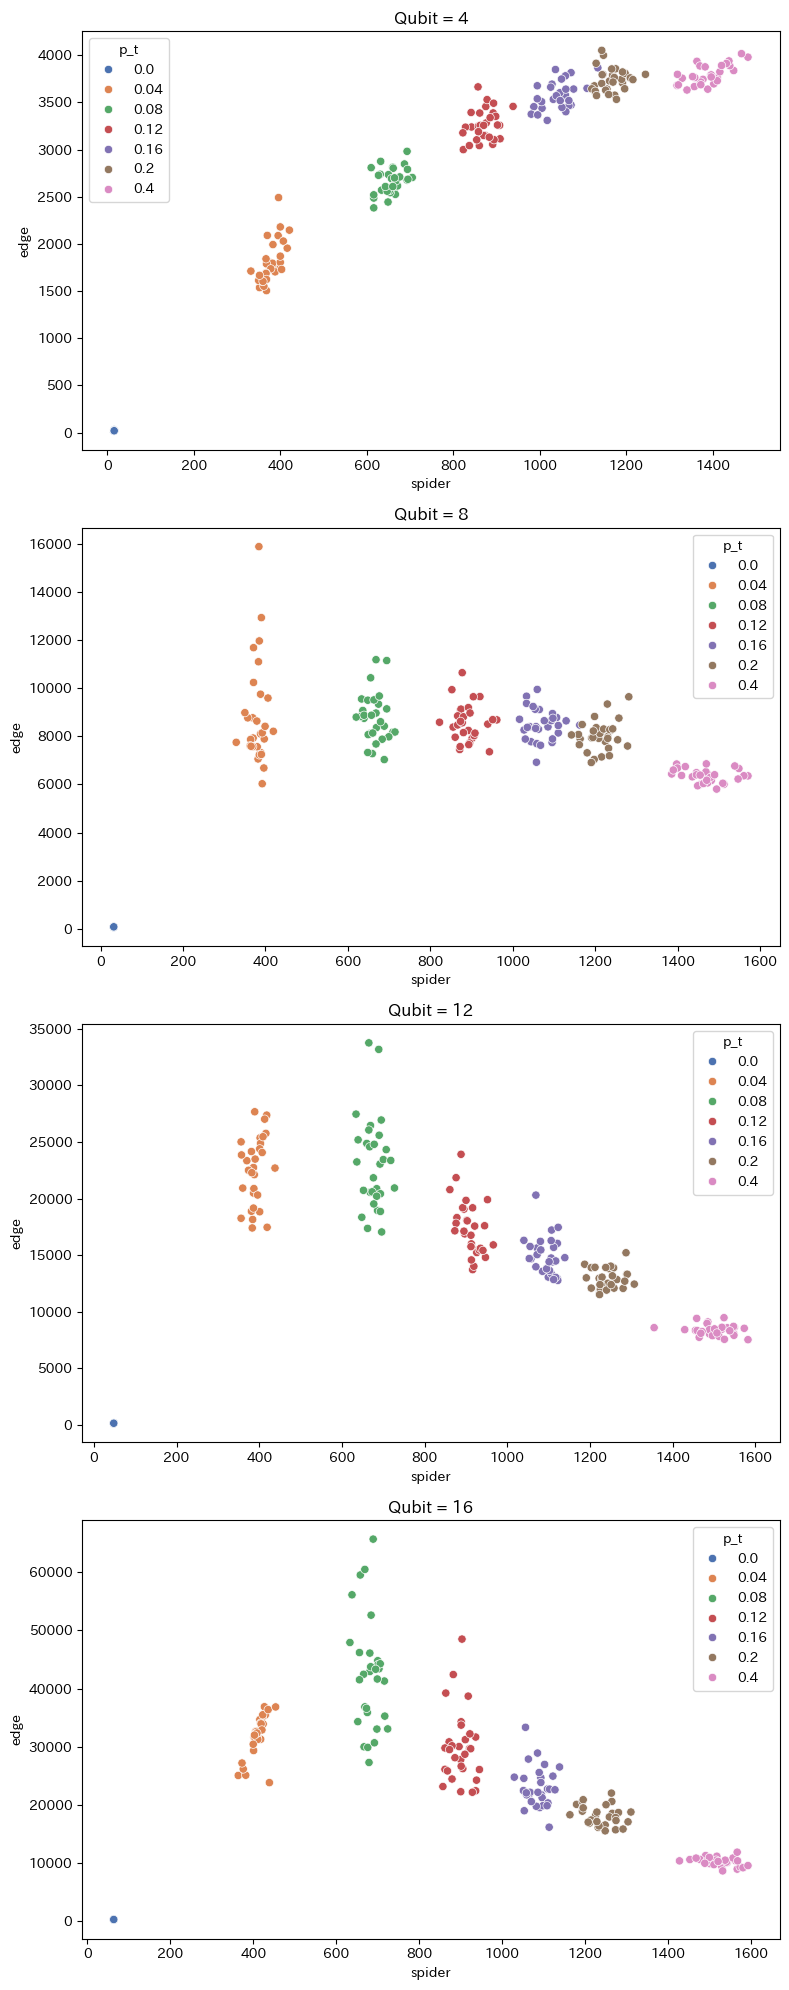

Qubit = 4, p_t = 0: 0.4345779050723525
Qubit = 4, p_t = 0.04: 0.6353967147424918
Qubit = 4, p_t = 0.08: 0.37895931876750455
Qubit = 4, p_t = 0.12: 0.259454291785522
Qubit = 4, p_t = 0.16: 0.45803530151334587
Qubit = 4, p_t = 0.2: 0.09583677846436117
Qubit = 4, p_t = 0.4: 0.6548436835286887
Qubit = 8, p_t = 0: nan
Qubit = 8, p_t = 0.04: 0.03688578376128431
Qubit = 8, p_t = 0.08: -0.09439139504834475
Qubit = 8, p_t = 0.12: -0.10969070084137904
Qubit = 8, p_t = 0.16: -0.07397494082675
Qubit = 8, p_t = 0.2: 0.26457237119012084
Qubit = 8, p_t = 0.4: -0.23305467976165437
Qubit = 12, p_t = 0: nan
Qubit = 12, p_t = 0.04: 0.2569507817126633
Qubit = 12, p_t = 0.08: -0.1190398433656031
Qubit = 12, p_t = 0.12: -0.5175680668563224
Qubit = 12, p_t = 0.16: -0.2794524402933426
Qubit = 12, p_t = 0.2: 0.08597375774236302
Qubit = 12, p_t = 0.4: -0.18707914859674107
Qubit = 16, p_t = 0: nan
Qubit = 16, p_t = 0.04: 0.6973154857621475
Qubit = 16, p_t = 0.08: -0.24158716472074976
Qubit = 16, p_t = 0.12: -0.0

In [81]:
#横軸 スパイダー数　縦軸　エッジ数
import numpy as np
from scipy.stats import skew

qubits = [4, 8, 12,16]
p_t_lists = [0,0.04,0.08,0.12,0.16,0.20,0.40]

x =[]
y =[]
p_t_values = []  # p_t の値を保持
q_values = []  # qubits の値を保持

for q in qubits:
    for p_t in p_t_lists:
        data = df[(df["p_t"] == p_t) & (df["qubit"] == q) & (df["input_gates"] == 10000)]
        #データの要素数
        #print(data.shape)
        for index,row in data.iterrows():
            spider = row['spider count']
            edge = row['edge count']
            x.append(spider)
            y.append(edge)
            p_t_values.append(p_t)
            q_values.append(q)  # qubit数をリストに追加

import seaborn as sns

# データフレームを作成
df_plot = pd.DataFrame({
    'spider': x,
    'edge': y,
    'p_t': p_t_values,
    'qubit': q_values
})

#df_plotの形状を表示
print(df_plot.shape)

# qごとに異なるグラフを作成
unique_q_values = df_plot['qubit'].unique()

# サブプロットの設定
fig, axes = plt.subplots(len(unique_q_values), 1, figsize=(8, len(unique_q_values) * 5))

# qごとにプロット
for i, q_value in enumerate(unique_q_values):
    ax = axes[i]
    subset = df_plot[df_plot['qubit'] == q_value]
    
    # p_t に基づいて色分け
    sns.scatterplot(data=subset, x='spider', y='edge', hue='p_t', palette='deep', ax=ax)
    
    ax.set_title(f"Qubit = {q_value}")
    ax.set_xlabel('spider')
    ax.set_ylabel('edge')

# qubitごとに相関係数を計算
for q_value in unique_q_values:
    subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']!=0.0)]
    #corr = subset[['mean', 'two_qubit_gates']].corr()
    #meanとtwo_qubitの相関係数のみを取得
    corr = subset[['spider', 'edge']].corr()
    correlation_value = corr.loc['spider', 'edge']
    print(f"Qubit = {q_value}: {correlation_value}")


# レイアウト調整
plt.tight_layout()
plt.show()

#qごと、p_tごとに相関係数を計算
for q_value in unique_q_values:
    for p_t in p_t_lists:
        subset = df_plot[(df_plot['qubit'] == q_value) & (df_plot['p_t']==p_t)]
        #if (q_value==8 and p_t==0):
        #    print(subset)
        corr = subset[['spider', 'edge']].corr()
        correlation_value = corr.loc['spider', 'edge']
        print(f"Qubit = {q_value}, p_t = {p_t}: {correlation_value}")